In [1]:
import pandas as pd

# Delimiter irá definir o separador de cada dado qualquer quantidade de espaço em branco (r"\s+")
df = pd.read_csv('seeds_dataset.txt', delimiter=r"\s+", header=None)

# Definindo o nome das colunas
header = ['area', 'perimeter', 'compactness', 'core_length', 'core_width', 'asymmetry_coefficient', 'core_groove_length', 'target']
df.columns = header

df.head()

,area,perimeter,compactness,core_length,core_width,asymmetry_coefficient,core_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Não há dados nulos/ausentes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   core_length            210 non-null    float64
 4   core_width             210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   core_groove_length     210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [3]:
df.describe()

,area,perimeter,compactness,core_length,core_width,asymmetry_coefficient,core_groove_length,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'perimeter'}>,
        <Axes: title={'center': 'compactness'}>],
       [<Axes: title={'center': 'core_length'}>,
        <Axes: title={'center': 'core_width'}>,
        <Axes: title={'center': 'asymmetry_coefficient'}>],
       [<Axes: title={'center': 'core_groove_length'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

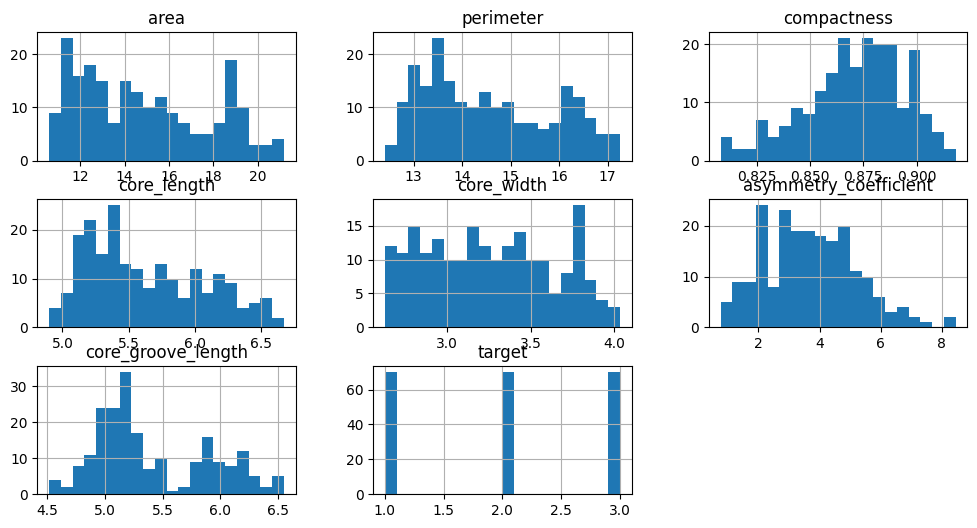

In [4]:
df.hist(figsize=(12,6), bins=20)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'area'),
  Text(1, 0, 'perimeter'),
  Text(2, 0, 'compactness'),
  Text(3, 0, 'core_length'),
  Text(4, 0, 'core_width'),
  Text(5, 0, 'asymmetry_coefficient'),
  Text(6, 0, 'core_groove_length'),
  Text(7, 0, 'target')])

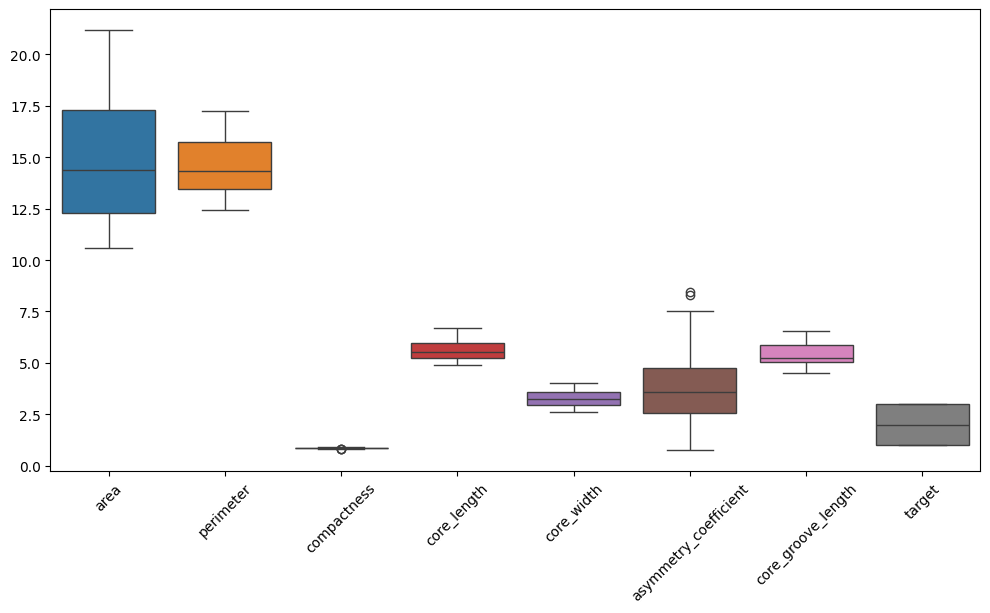

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

<Axes: >

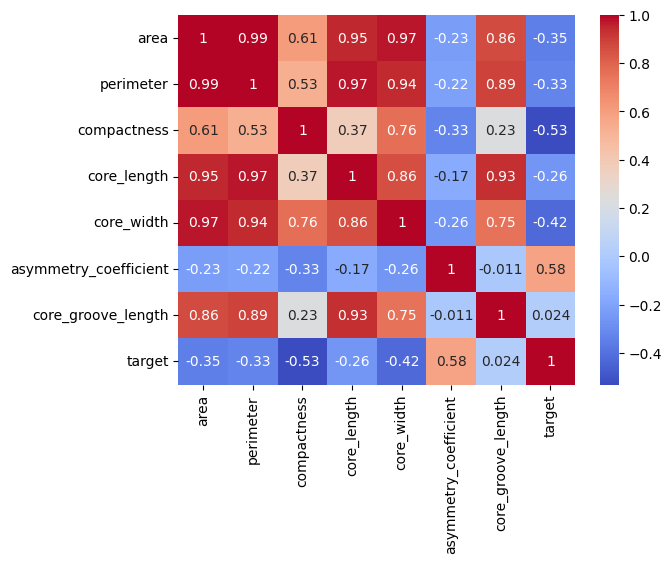

In [6]:
corr = df.corr()

# Matriz de Correlação
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

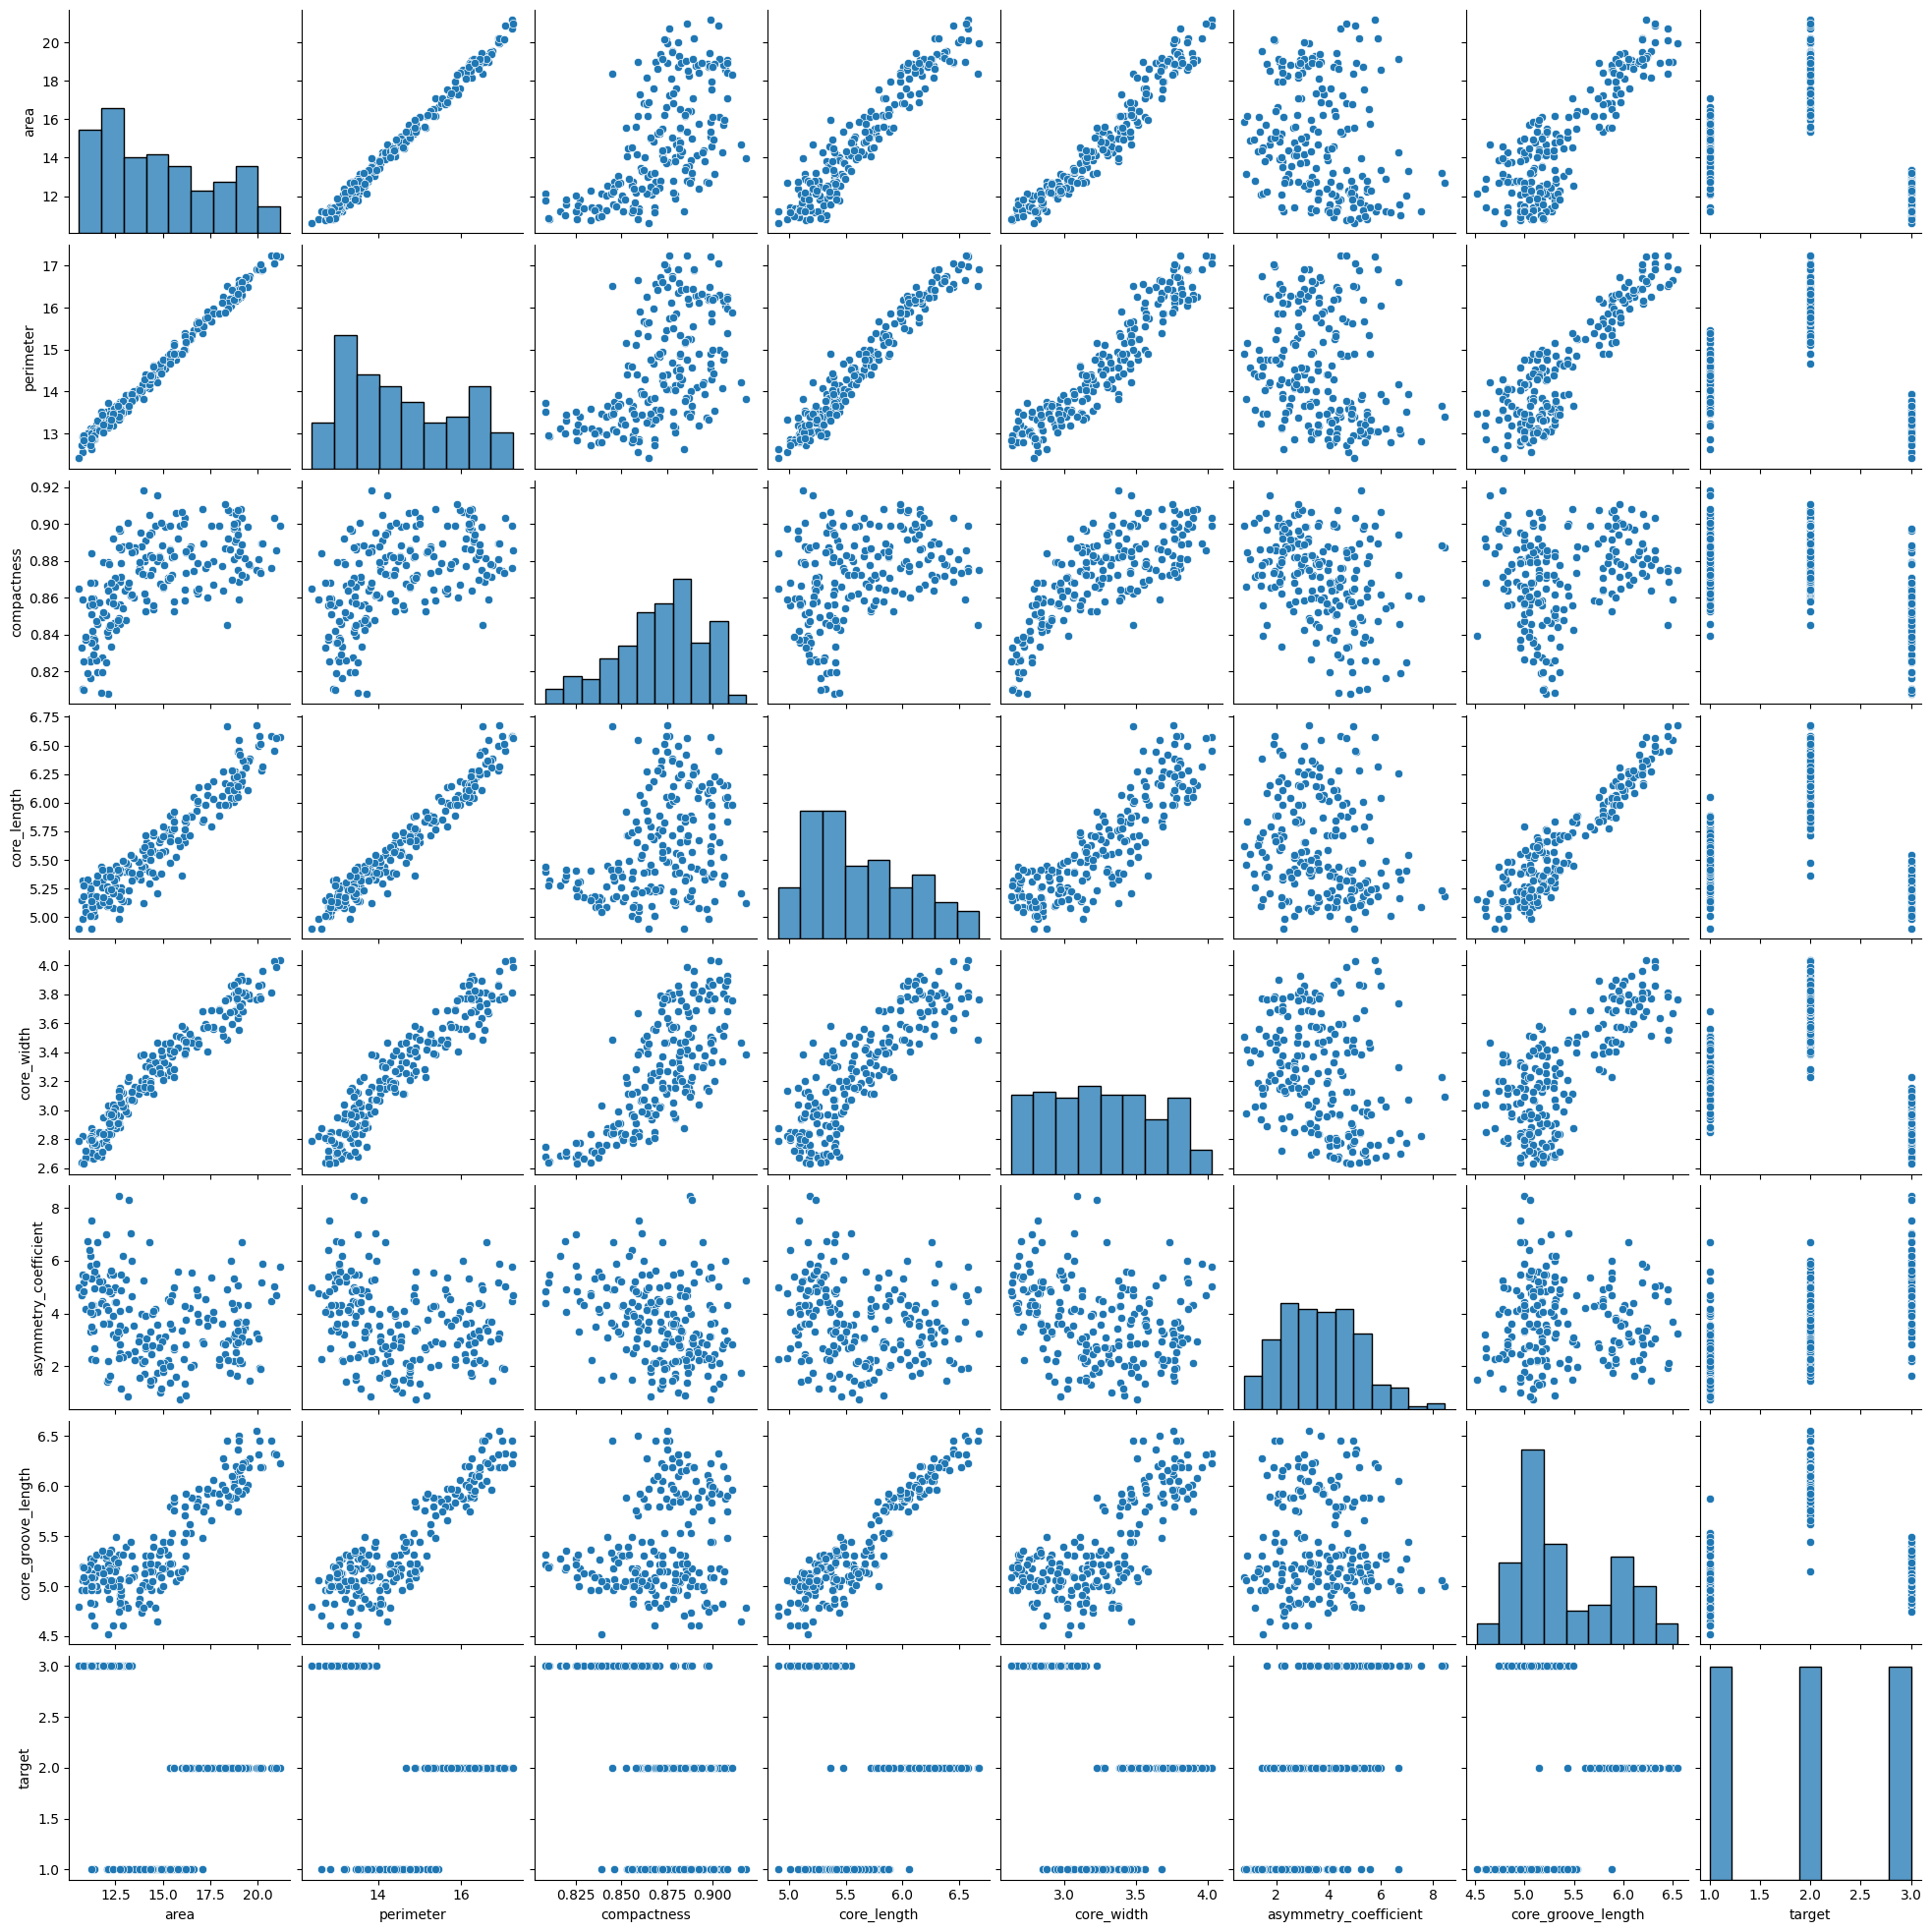

In [7]:
# Gráfico de dispersão com cada uma das variáveis
sns.pairplot(data=df)

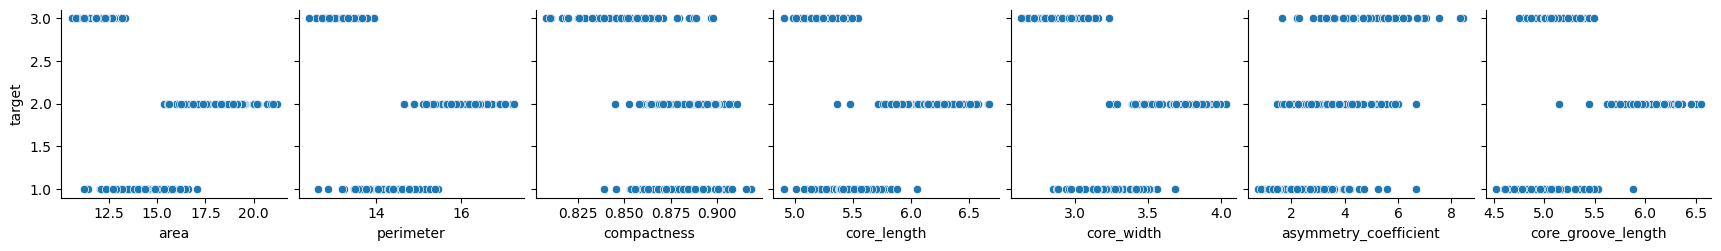

In [8]:
# Gráfico de dispersão apenas com as relações com a variável alvo
sns.pairplot(data=df, y_vars='target', x_vars=df.drop('target', axis=1).columns)

Os dados estão balanceados, há 70 amostras para cada tipo de grão.

In [9]:
# Verificando o balanceamento dos dados
df['target'].value_counts()

target
1    70
2    70
3    70
Name: count, dtype: int64

**Separando as características (X) dos rótulos (y)**

In [10]:
X = df.drop('target', axis=1)
y = df['target']

### Separação dos dados em treino e teste

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

### Normalização (Pré processamento)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinamento e teste dos modelos

In [13]:
def view_predict_scores(predicts, y_true):
    accuracy = accuracy_score(y_true, predicts)
    print(f'Acurácia: {accuracy*100:.2f}%')

    recall = recall_score(y_true, predicts, average='macro')
    print(f'Recall: {recall*100:.2f}%')

    precision = precision_score(y_true, predicts, average='macro')
    print(f'Precisão: {precision*100:.2f}%')

    f1_score_ = f1_score(y_true, predicts, average='macro')
    print(f'F1 Score: {f1_score_*100:.2f}%')

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Primeiramente com uma floresta aleatória
model_rf = RandomForestClassifier(random_state=SEED)
model_rf.fit(X_train_scaled, y_train)

predict_rf = model_rf.predict(X_test_scaled)
view_predict_scores(predict_rf, y_test)

Acurácia: 92.86%
Recall: 92.86%
Precisão: 93.17%
F1 Score: 92.94%


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Árvore aleatória
model_dt = DecisionTreeClassifier(random_state=SEED)
model_dt.fit(X_train_scaled, y_train)

predict_dt = model_dt.predict(X_test_scaled)
view_predict_scores(predict_dt, y_test)

Acurácia: 90.48%
Recall: 90.48%
Precisão: 90.48%
F1 Score: 90.48%


In [16]:
from sklearn.svm import SVC

# SVC
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

predict_svc = model_svc.predict(X_test_scaled)
view_predict_scores(predict_svc, y_test)

Acurácia: 95.24%
Recall: 95.24%
Precisão: 95.40%
F1 Score: 95.24%


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

predict_knn = model_knn.predict(X_test_scaled)
view_predict_scores(predict_knn, y_test)

Acurácia: 92.86%
Recall: 92.86%
Precisão: 92.83%
F1 Score: 92.77%


### Pontos a se pensar no modo como testamos e treinamos os modelos

Pelo fato dos algorítmos de *Árvore de Decisão* e *Floresta aleatória* poderem envolver componentes aleatórios no processo de treino, como a ordem das amostras ou o processo de divisão por nós. Por mais que definimos um *random_state* no processo de split dos dados nos algoritmos mencionados, é importante considerarmos que estamos lidando com aleatoriedade na hora do teste e treinamento.

Para garantirmos uma maior estabilidade das métricas no processo de treino e teste, podemos considerar realizar uma **validação cruzada** em sequência de um algorítmo de busca de melhores hiperparâmetros.

Iremos realizar isto pois fazendo apenas um treino e um teste, podemos estar correndo o risco de estarmos sendo muito otimistas em relação a performance do nosso modelo

In [18]:
# Primeiramente iremos criar uma função que irá exibir os scores baseado na média e desvio padrão da validação cruzada aninhada
def view_cross_val_scores(scores):
    media = scores.mean() * 100
    desvio_padrao = scores.std() * 100
    print(f'Acurácia Médio: {media:.2f}%')
    print(f'Intervalo: {(media - 2 * desvio_padrao):.2f}% // {(media + 2 * desvio_padrao):.2f}')

# Assim como, uma função para exibir os resultados da validação cruzada
def view_cross_validate_scores(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    media_treino = results['train_score'].mean()

    print(f'Acurácia média treino: {media_treino*100:.2f}%')
    print(f'Acurácia média teste: {media*100:.2f}%')
    print(f'Acurácia com validação cruzada: {(media - 2 * desvio_padrao)*100:.2f}% // {(media + 2 * desvio_padrao)*100:.2f}%')

Antes de qualquer coisa, vamos criar uma classe para fazer todo esse processo de forma mais automatizada.

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
# Classe para automatizar o processo de validação cruzada e otimização de parâmetros
class Model_ML:
    def __init__(self, estimator, cv, params, X, y):
        self.estimator = estimator
        self.cv = cv
        self.params = params
        self.X = X
        self.y = y
        self.search = None
    
    # Algorítimo de busca aleatória
    def random_search(self, n_iter = 16, seed = 42):
        self.search = RandomizedSearchCV(self.estimator, 
                            self.params, 
                            cv=self.cv,
                            random_state=seed,
                            n_iter=n_iter,
                            n_jobs=-1)
    
    # Algorítimo de busca em grid
    def grid_search(self):
        self.search = GridSearchCV(self.estimator,
                      self.params, 
                      cv=self.cv, 
                      n_jobs=-1)

    # Treina o algorítimo de busca com validação cruzada
    def training(self):
        self.search.fit(self.X, self.y)

    # Validação Cruzada (Após o processo de treino)
    def cross_validate(self):
        results = cross_validate(self.estimator, self.X, self.y, cv=self.cv, return_train_score=True)
        view_cross_validate_scores(results)

    # Validação Cruzada Aninhada (Após o processo de treino e teste)
    def cross_val_score(self):
        scores = cross_val_score(self.search, self.X, self.y, cv=self.cv)
        view_cross_val_scores(scores)

### Validação Cruzada com busca de Hiperparâmetros

**Floresta Aleatória**

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit, KFold, StratifiedKFold
from scipy.stats import randint
from sklearn.pipeline import Pipeline

# Criação do pipeline de normalização junto com o estimador, será usado posteriormente
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', RandomForestClassifier())
])

# Já que o estimador está dentro de uma pipeline, os parâmetros precisam estar com o prefixo (estimator__)
params = {
    'estimator__n_estimators': randint(100,201), # Quantidade de árvores que serão criadas na floresta aleatória
    'estimator__max_depth': randint(2,20), # Profundidade das árvores (complexidade)
    'estimator__criterion': ['gini', 'entropy', 'log_loss']
}

model = Model_ML(pipeline,
                 StratifiedShuffleSplit(n_splits=5, random_state=SEED),
                 params,
                 X, y)

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model.random_search()
model.training()

# Validação Cruzada Aninhada para validação do modelo
model.cross_val_score()

Acurácia Médio: 92.38%
Intervalo: 84.76% // 100.00


**Árvore de Decisão**

In [47]:
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', DecisionTreeClassifier())
])

params = {
    'estimator__max_depth': randint(2,5),
    'estimator__criterion': ['gini', 'entropy']
}

model = Model_ML(pipeline,
                 StratifiedShuffleSplit(n_splits=10, random_state=SEED),
                 params,
                 X, y)

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model.random_search()
model.training()

# Validação Cruzada Aninhada para validação do modelo
model.cross_val_score()

Acurácia Médio: 91.43%
Intervalo: 83.13% // 99.73


**SVC**

In [49]:
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', SVC())
])

params = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.01, 0.1, 1],
    'estimator__kernel': ['linear', 'rbf']
}

model = Model_ML(pipeline,
                 StratifiedShuffleSplit(n_splits=10, random_state=SEED),
                 params,
                 X, y)

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model.random_search()
model.training()

# Validação Cruzada Aninhada para validação do modelo
model.cross_val_score()

Acurácia Médio: 92.38%
Intervalo: 81.78% // 102.99


**KNN**

In [51]:
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', KNeighborsClassifier())
])

params = {
    'estimator__n_neighbors': randint(1, 50),            # Número de vizinhos entre 1 e 50
    'estimator__weights': ['uniform', 'distance'],       # Tipos de peso para os vizinhos
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski'],  # Métricas de distância
    'estimator__leaf_size': randint(20, 60),             # Tamanho da folha
    'estimator__p': [1, 2],                              # Potência para a distância Minkowski
    'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo de busca
}

model = Model_ML(pipeline,
                 StratifiedShuffleSplit(n_splits=10, random_state=SEED),
                 params,
                 X, y)

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model.random_search()
model.training()

# Validação Cruzada Aninhada para validação do modelo
model.cross_val_score()

Acurácia Médio: 92.38%
Intervalo: 83.65% // 101.11
